<h1><center>Laboratorio 9: Los huesos de Hip√≥crates ü¶¥</center></h1>

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Mat√≠as Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno 1: Felipe Aguilar
- Nombre de alumno 2: Joaqu√≠n P√©rez O.


### **Link de repositorio de GitHub:** `https://github.com/JoaquinPerez17/Lab-MDS7202`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcci√≥n del laboratorio](#Descripci√≥n-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Creaci√≥n de clasificadores de imagenes a traves de redes Fully connected y CNN.
- Uso de Dataloaders para la carga de datasets.
- Comparaci√≥n de Fully Connected y red convolucional.

## Reglas:

- Fecha de entrega: 17/11/2022
- **Grupos de 2 personas**
- **Ausentes** deber√°n realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Creaci√≥n de modelos de clasificaci√≥n de im√°genes utilizando Pytorch.
- Creaci√≥n de dataloader y aplicar transformaciones sobre el dataset.
- Comprender la diferencia entre una CNN y una Fully Connected.

El laboratorio deber√° ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al m√°ximo las funciones de `Pytorch`, la cual, est√° enfocada para proyectos de Deep Learning.


# Importamos librerias utiles üò∏

Comenzamos importando librer√≠as utiles para la ejecuci√≥n del laboratorio:

In [74]:
import os
import time
from PIL import Image

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, random_split

import torchvision
from torchvision import datasets, models
from torchvision import transforms as T

from timeit import default_timer as timer
from sklearn.metrics import accuracy_score
import sys

import warnings
warnings.filterwarnings("ignore")
# semilla fija para que los experimentos sean repetibles
t_cg = torch.manual_seed(42)

# Identificando los Huesos de Hip√≥cratesüîé

<p align="center">
  <img src="https://i.pinimg.com/originals/d8/58/66/d85866cd1cc3979f94526551addf74b4.gif" width="300">
</p>

Tras el √©xito que han tenido proponiendo modelos de machine learning en trabajos anteriores, el famoso medico Hip√≥crates se ha contactado con ustedes para solicitarles ayuda para automatizar la identificaci√≥n de radiograf√≠as de partes humanas. Para esto, les se√±ala que le gustar√≠a utilizar algoritmos de deep learning producto que Dem√≥crito le se√±alo que resultan la mejor alternativa para la predicci√≥n de im√°genes.

En su conversaci√≥n con el medico usted le comenta que ha tenido algunas clases relacionadas a Deep Learning, por esto, est√°n motivados en abordar el problema utilizando redes Fully Connected y redes convolucionales con Pytorch. Sin embargo, al anunciarle los tipos de redes que conocen, el fil√≥sofo les comenta que no hab√≠a escuchado muy buenos resultados por parte de las CNN, por lo que les pide que comprueben a traves de la m√©trica de accuracy que tipo de redes es mejor para la tarea de identificaci√≥n de radiograf√≠as. ¬øSer√° cierto lo que dice el fil√≥sofo?, Ve√°moslo en un nuevo cap√≠tulo de los Laboratorios de Programaci√≥n Cient√≠fica para Ciencia de Datos!

In [2]:
# Si usted est√° utilizando Colabolatory le puede ser √∫til este c√≥digo para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Laboratorios MDS/Laboratorio_9/'
except: 
    print('Ignorando conexi√≥n drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "/content/drive/MyDrive/Laboratorios MDS/Laboratorio_9/Medical-MNIST.zip" 

Se han truncado las √∫ltimas 5000 l√≠neas del flujo de salida.
 extracting: Medical-MNIST/HeadCT/005000.jpeg  
 extracting: Medical-MNIST/HeadCT/005001.jpeg  
 extracting: Medical-MNIST/HeadCT/005002.jpeg  
 extracting: Medical-MNIST/HeadCT/005003.jpeg  
  inflating: Medical-MNIST/HeadCT/005004.jpeg  
 extracting: Medical-MNIST/HeadCT/005005.jpeg  
 extracting: Medical-MNIST/HeadCT/005006.jpeg  
 extracting: Medical-MNIST/HeadCT/005007.jpeg  
 extracting: Medical-MNIST/HeadCT/005008.jpeg  
 extracting: Medical-MNIST/HeadCT/005009.jpeg  
  inflating: Medical-MNIST/HeadCT/005010.jpeg  
  inflating: Medical-MNIST/HeadCT/005011.jpeg  
 extracting: Medical-MNIST/HeadCT/005012.jpeg  
 extracting: Medical-MNIST/HeadCT/005013.jpeg  
 extracting: Medical-MNIST/HeadCT/005014.jpeg  
 extracting: Medical-MNIST/HeadCT/005015.jpeg  
 extracting: Medical-MNIST/HeadCT/005016.jpeg  
 extracting: Medical-MNIST/HeadCT/005017.jpeg  
 extracting: Medical-MNIST/HeadCT/005018.jpeg  
 extracting: Medical-MNIS

## 1.1 Creaci√≥n de Lista de Archivos

<p align="center">
  <img src="https://media.tenor.com/BJ-9w-MUVCMAAAAM/tis100-sad.gif" width="300">
</p>


Comience revisando de forma manual cada una de las im√°genes que posee la carpeta subida a material docente. Verifique la cantidad de tipos de radiograf√≠as que se tienen y la cantidad de im√°genes que dispone cada carpeta.

Revisado el contenido de las im√°genes, utilice `os.listdir` para crear un `numpy.array` o un `Dataframe` que contenga las im√°genes y un label que se√±ale al tipo de radiograf√≠a a la que hace referencia la imagen. Para hacer las etiquetas codifique el tipo de im√°genes en n√∫meros que vayan del 0 al total de tipos de radiograf√≠as, no utilice strings para codificar las etiquetas.

**Ejemplo de Estructura:**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax"></th>
    <th class="tg-0lax">image_path</th>
    <th class="tg-0lax">label</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">image1</td>
    <td class="tg-0lax">1</td>
  </tr>
  <tr>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">image2</td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">image3</td>
    <td class="tg-0lax">2</td>
  </tr>
  <tr>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">image4</td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">image5</td>
    <td class="tg-0lax">4</td>
  </tr>
</tbody>
</table>

In [75]:
# C√≥digo Aqu√≠
df = []
path_carpeta = '/content/Medical-MNIST'
for i, category in enumerate(os.listdir(path_carpeta)):
  label = i
  path_subcarpeta = path_carpeta + '/' + category 
  for image in os.listdir(path_subcarpeta):
    images = f"{path_subcarpeta}/{image}"
    df.append([images, label])
df =  np.array(df)

## 1.2 Creaci√≥n de Dataset

Tomando en cuenta la estructura de datos desarrollada en el punto 1.1, construya la clase `MedicalDataset()` que cumpla los siguientes puntos:

- [ ] Poseer un `__init__` en el que se almacene `estructura` creada en 1.1, la `raiz` de la carpeta y una funci√≥n que permita transformar el dataset (de esto no se preocupe mucho, ya que solamente debe almacenar una funci√≥n en el atributo).
- [ ] La clase debe ser capaz de entregar la cantidad de elementos a traves de `__len__`.
- [ ] Debe poseer el m√©todo `__getitem__` que retorne una tupla con la imagen y su correspondiente etiqueta.

In [76]:
# C√≥digo Aqu√≠
class MedicalDataset(Dataset):
    def __init__(self, estructura, raiz, transform):
        self.estructura = estructura
        self.raiz = raiz
        self.transform = transform
    
    def __getitem__(self, index):
        
        # Un poco de ayuda para cargar la imagen
        img_path = self.estructura[index][0]
        image = Image.open(img_path).convert('RGB')

        label = torch.tensor(int(self.estructura[index][1]))

        # Auida para realizar la transformaci√≥n
        if self.transform:
            image = self.transform(image)

        return label, image
    
    def __len__(self):
        return len(self.estructura)

## 1.3 Prueba del MedicalDataset

Con la clase construida en el punto 1.2, verifique su funcionamiento cargando el dataset y realizando las transformaciones que entrega la funci√≥n `transform_image`. Compruebe a trav√©s de un ejemplo las transformaciones aplicadas en la imagen, comentando la funci√≥n que cumple `MedicalDataset` y si es posible observar todas las transformaciones aplicadas con la funci√≥n `transform_image`.

- [ ] Probar la clase MedicalDataset y aplicando una transformaci√≥n de "train"
- [ ] Plotear un ejemplo del MedicalDataset.

**Funci√≥n para transformar las imagenes:**

In [77]:
def transform_image(stage = None):
    
    if stage == "train":
        Tr_img = T.Compose([T.Resize(size = (64, 64)),
                T.ToTensor()])
        
    elif stage == "test" or stage == "val":
        Tr_img = T.Compose([T.Resize(size = (64,64)), T.ToTensor()]) 

    return Tr_img

**C√≥digo para obtener un ejemplo:**

In [78]:
# Prueba del dataset
dataset = MedicalDataset(df, path_carpeta, transform_image("train"))

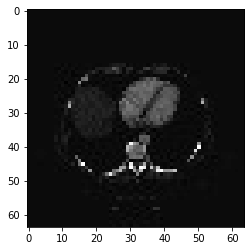

In [79]:
labels, features = next(iter(dataset))
img = features[0]
label = labels
plt.imshow(img, cmap='gray')

> Comente que realiza la clase construida y las transformaciones aplicadas.

## 1.4 Creaci√≥n de Clasificadores

<p align="center">
  <img src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2018/01/conv-full-layer.gif" width="300">
</p>

A continuaci√≥n, deben construir tres clasificadores con los que deber√°n verificar cu√°l de las arquitecturas posee un mejor desempe√±o para la tarea de clasificaci√≥n de im√°genes. Para la construcci√≥n considere los siguientes puntos:

- [ ] Se√±ale cual es el objetivo del `forward` en este tipo de redes, sea breve para su explicaci√≥n.
- [ ] Construir una red Fully Connected para solucionar el problema de clasificaci√≥n. Para esta parte se le aconseja que rellene el esqueleto dispuesto m√°s abajo y que lleva el nombre de `FCClassifier`, en el deber√° rellenar con la dimensi√≥n de las capas ocultas y verificar cual ser√° el tama√±o de la entrada.
- [ ] Construya una red convolucional **simple** (no m√°s de una capa convolucional) para la tarea de clasificaci√≥n de im√°genes, para esto basen su c√≥digo en la clase del d√≠a `09-11-2022`.
- [ ] Crear una red convolucional m√°s compleja. Para esta parte tienen completa libertad en la construcci√≥n de su red, lo √∫nico que debe cumplir es que sea convolucional.

**Esqueletos Propuestos:**

In [90]:
class FCClassifier(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(FCClassifier, self).__init__()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_channels, 600)
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(600, 120)
        self.drop2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(120, num_classes)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.drop1(x)
        x = F.relu(self.fc2(x))
        x = self.drop2(x)
        x = F.relu(self.fc3(x))
        return x

In [109]:
class CNNClassifier1(nn.Module):
  def __init__(self, in_channels, num_classes):
    super(CNNClassifier1, self).__init__()

    self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d((2,2), stride=2, padding=0)
        )

    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(32 * 31 * 31, 600)
    self.drop1 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(600, 120)
    self.drop2 = nn.Dropout(0.5)
    self.fc3 = nn.Linear(120, num_classes)
    
  def forward(self, x):
    x = self.layer1(x)
    x = self.flatten(x)
    x = F.relu(self.fc1(x))
    x = self.drop1(x)
    x = F.relu(self.fc2(x))
    x = self.drop2(x)
    x = F.relu(self.fc3(x))
    return x

In [118]:
class CNNClassifier2(nn.Module):
  def __init__(self, in_channels, num_classes):
    super(CNNClassifier2, self).__init__()

    self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d((2,2), stride=2, padding=0))
  
    self.layer2 = nn.Sequential(
              nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.BatchNorm2d(256),
              nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.BatchNorm2d(256),
              nn.MaxPool2d((2,2), stride=2, padding=0))
    
    self.layer3 = nn.Sequential(
              nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3),
              nn.ReLU(),
              nn.BatchNorm2d(512),
              nn.MaxPool2d((2,2), stride=2, padding=0))

    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(512 * 5 * 5 , 256)
    self.drop1 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(256, 120)
    self.drop2 = nn.Dropout(0.5)
    self.fc3 = nn.Linear(120, num_classes)
    
  def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = self.layer3(x)
      x = self.flatten(x)
      x = F.relu(self.fc1(x))
      x = self.drop1(x)
      x = F.relu(self.fc2(x))
      x = self.drop2(x)
      x = F.relu(self.fc3(x))
      return x 

## 1.5 Separando Datos para el Entrenamiento

<p align="center">
  <img src="https://c.tenor.com/Esn7Jif-ZLQAAAAC/separate-square.gif" width="200">
</p>

Utilizando un Holdout a su gusto, separe los datos en un conjunto de entrenamiento y de testing. Aplique las transformaciones correspondientes usando `transform_image` para cada conjunto de datos y utilice `torch.utils.data.DataLoader` para crear un objeto iterable del dataset.

- [ ] Definir el Holdout a utilizar.
- [ ] Separar los datos en un conjunto de entrenamiento y prueba.
- [ ] Aplicar las transformaciones correspondientes en cada uno de los dataset.
- [ ] Utilizar `DataLoader` de pytorch sobre los dataset.

In [91]:
# Separar Datos de Entrenamiento
train_size = int(0.7 * len(df))
test_size = len(df) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(df, [train_size, test_size])
train_dataset = MedicalDataset(train_dataset, path_carpeta, transform_image("train"))
test_dataset = MedicalDataset(test_dataset, path_carpeta, transform_image("test"))

## 1.6 Creaci√≥n de Funciones de Entrenamiento y Evaluaci√≥n

<p align="center">
  <img src="https://www.researchgate.net/publication/319535615/figure/fig3/AS:536187598065664@1504848493070/A-typical-convolutional-neural-network-CNN-Architecture-for-Medical-Image-Classification.png" width="500">
</p>


Ya construido todas las funciones y clases necesarias llego el momento m√°s importante... probar la red. Para esta secci√≥n, ustedes deber√°n ser capaces de definir los hiperpar√°metros de la red, definir las funciones de perdida a utilizar, se√±alar el optimizador a usar y finalmente crear sus funciones para el entrenamiento y prueba. Para realizar esta parte m√°s estructurada, seguir los siguientes puntos de forma secuencial:

- [ ] Especifique los Hiperpar√°metros de las 3 redes. Para esta parte sea claro de su elecci√≥n y se√±ale el porqu√© de sus elecciones (o sea justifique el setting de sus hiperpar√°metros).
- [ ] Defina los modelos a utilizar, el optimizador que utilizar√° para el modelo y se√±ale la funci√≥n de perdida que utilizar√°.
- [ ] Explique de forma breve la funci√≥n que cumplen los pasos `Backward` y `Descenso del gradiente` en una red neuronal.
- [ ] Cree una funci√≥n llamado `train` que entrene a los clasificadores. Para esto, recuerde que estos modelos suelen utilizar un n√∫mero de √©pocas, por lo que deber√° generar un proceso iterativo de entrenamiento. Es importante que su funci√≥n imprima las `loss` obtenidas por el modelo en cada √©poca (si gusta puede almacenar estas losses en una lista para luego graficarlas y comparar).
- [ ] Dise√±e una funci√≥n para evaluar el desempe√±o de las redes. Para evaluar las redes utilice solamente la m√©trica accuracy (para esto se le recomienda comparar la predicci√≥n con el ground truth)

In [126]:
# train
def train(model, train_loader, num_epochs, criterio, optimizador, device=None):
    model.to(device)
    tiempo_epoca = 0
    loss_train = []
    for e in range(1, n_epochs+1):
        inicio_epoca = timer()
        model.train()
        train_loss = 0.0

        for i, (label, data) in enumerate(train_loader, 0):
            # desagregaci√≥n de los datos y traspaso a cuda
            targets = label.to(device)
            data = data.float().to(device)
             # Limpiar gradientes 
            optimizador.zero_grad()         
            #Forward
            outputs = model(data) 
            #Backward
            loss = criterio(outputs, targets)
            loss.backward()
            # Descenso del gradiente
            optimizador.step()

             # loss train
            train_loss += loss.item()
            loss_avg = train_loss/(i+1)
            sys.stdout.write(f'\r√âpoca:{e} ' + 'Entrenamiento->' + f' Train Loss:{loss_avg:02.4f}. ')

        tiempo_epoca += timer() - inicio_epoca  
        loss_train.append(loss_avg)
        sys.stdout.write(f'Tiempo de √©poca:{tiempo_epoca/e:.2f}s.\n')

    return loss_train

# Evaluate
def evaluate(loader, model, device = None):
    model.to(device)
    model.eval()
    predicted = []
    true = []
    with torch.no_grad():
        for i, (label, data) in enumerate(loader):
          targets = label.to(device)
          data = data.float().to(device)
          outputs = model(data)
          predicts = torch.argmax(outputs, dim=1)
          predicted += predicts.tolist()
          true += targets.tolist()

    acc = round(accuracy_score(true, predicted), 4)
    return acc

In [121]:
def plot_results(l_train1, l_train2, l_train3):
  figure = plt.figure(1)
  ax = figure.add_subplot(111)
  ax.set_title('Loss Train')    
  ax.set_xlabel('epochs')
  ax.set_ylabel('loss')
  ax.plot(l_train1, c='b')
  ax.plot(l_train2, c='r')
  ax.plot(l_train3, c='g')
  ax.legend(['loss-train-fc', 'loss-train-cnn1', 'loss_train-cnn2'])
  figure.show()


In [93]:
# Especificar hyperpar√°metros de las redes
in_channels_fc = 64 * 64 * 3
in_channels_cnn = 3
num_classes = 6
lr = 1e-3
batch_size = 100
n_epochs = 10

In [94]:
# Red 1
model_fc = FCClassifier(in_channels_fc, num_classes)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_fc.parameters(), lr=1e-3)  

In [96]:
# Uso de torch.utils.data.DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)  

## 1.7 Comparaci√≥n de Resultados

<p align="center">
  <img src="https://media2.giphy.com/media/icJA0VF7ntoEL18Jez/giphy.gif"  width="200">
</p>

Construidas las funciones de entrenamiento y evaluaci√≥n, entrene a las redes que construyo y compare los resultados obtenidos con todas las redes se√±alando cual posee mejor rendimiento. Comente una diferencia entre las redes Fully Connected y CNN podr√≠a generar un mejor desempe√±o en una u otra en la tarea de clasificaci√≥n de im√°genes.

- [ ] Entrenar las redes.
- [ ] Evaluar las redes.
- [ ] Comentar los resultados obtenidos y visualizar si existe una diferencia significativa en el rendimiento debido a la naturaleza de la red.

In [35]:
Loss_train_fc = train(model_fc, train_loader, n_epochs, criterion, optimizer, 'cuda')

√âpoca:1 Entrenamiento-> Train Loss:1.1522. Tiempo de √©poca:18.28s.
√âpoca:2 Entrenamiento-> Train Loss:0.9498. Tiempo de √©poca:18.46s.
√âpoca:3 Entrenamiento-> Train Loss:0.9339. Tiempo de √©poca:18.43s.
√âpoca:4 Entrenamiento-> Train Loss:0.9313. Tiempo de √©poca:18.35s.
√âpoca:5 Entrenamiento-> Train Loss:0.9266. Tiempo de √©poca:18.42s.
√âpoca:6 Entrenamiento-> Train Loss:0.9247. Tiempo de √©poca:18.40s.
√âpoca:7 Entrenamiento-> Train Loss:0.9236. Tiempo de √©poca:18.36s.
√âpoca:8 Entrenamiento-> Train Loss:0.9259. Tiempo de √©poca:18.37s.
√âpoca:9 Entrenamiento-> Train Loss:0.9229. Tiempo de √©poca:18.35s.
√âpoca:10 Entrenamiento-> Train Loss:0.9214. Tiempo de √©poca:18.34s.
√âpoca:11 Entrenamiento-> Train Loss:0.9203. Tiempo de √©poca:18.34s.
√âpoca:12 Entrenamiento-> Train Loss:0.9210. Tiempo de √©poca:18.33s.


In [97]:
Loss_train_fc = train(model_fc, train_loader, n_epochs, criterion, optimizer, 'cuda')

√âpoca:1 Entrenamiento-> Train Loss:0.5222. Tiempo de √©poca:20.23s.
√âpoca:2 Entrenamiento-> Train Loss:0.1878. Tiempo de √©poca:20.04s.
√âpoca:3 Entrenamiento-> Train Loss:0.1552. Tiempo de √©poca:19.86s.
√âpoca:4 Entrenamiento-> Train Loss:0.1512. Tiempo de √©poca:19.64s.
√âpoca:5 Entrenamiento-> Train Loss:0.1528. Tiempo de √©poca:19.48s.
√âpoca:6 Entrenamiento-> Train Loss:0.1432. Tiempo de √©poca:19.29s.
√âpoca:7 Entrenamiento-> Train Loss:0.1594. Tiempo de √©poca:19.29s.
√âpoca:8 Entrenamiento-> Train Loss:0.1423. Tiempo de √©poca:19.16s.
√âpoca:9 Entrenamiento-> Train Loss:0.1146. Tiempo de √©poca:19.17s.
√âpoca:10 Entrenamiento-> Train Loss:0.1286. Tiempo de √©poca:19.07s.


In [110]:
# Red 2
model_cnn1 = CNNClassifier1(in_channels_cnn, num_classes)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn1.parameters(), lr=1e-3)  

In [111]:
Loss_train_cnn1 = train(model_cnn1, train_loader, n_epochs, criterion, optimizer, 'cuda')

√âpoca:1 Entrenamiento-> Train Loss:0.2531. Tiempo de √©poca:25.17s.
√âpoca:2 Entrenamiento-> Train Loss:0.0305. Tiempo de √©poca:25.53s.
√âpoca:3 Entrenamiento-> Train Loss:0.0214. Tiempo de √©poca:25.57s.
√âpoca:4 Entrenamiento-> Train Loss:0.0122. Tiempo de √©poca:25.63s.
√âpoca:5 Entrenamiento-> Train Loss:0.0156. Tiempo de √©poca:25.49s.
√âpoca:6 Entrenamiento-> Train Loss:0.0194. Tiempo de √©poca:25.53s.
√âpoca:7 Entrenamiento-> Train Loss:0.0080. Tiempo de √©poca:25.48s.
√âpoca:8 Entrenamiento-> Train Loss:0.0105. Tiempo de √©poca:26.10s.
√âpoca:9 Entrenamiento-> Train Loss:0.0116. Tiempo de √©poca:26.26s.
√âpoca:10 Entrenamiento-> Train Loss:0.0124. Tiempo de √©poca:26.57s.


In [119]:
# Red 3
model_cnn2 = CNNClassifier2(in_channels_cnn, num_classes)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn2.parameters(), lr=1e-3)  

In [120]:
Loss_train_cnn2 = train(model_cnn2, train_loader, n_epochs, criterion, optimizer, 'cuda')

√âpoca:1 Entrenamiento-> Train Loss:0.0713. Tiempo de √©poca:65.42s.
√âpoca:2 Entrenamiento-> Train Loss:0.0129. Tiempo de √©poca:65.36s.
√âpoca:3 Entrenamiento-> Train Loss:0.0146. Tiempo de √©poca:65.02s.
√âpoca:4 Entrenamiento-> Train Loss:0.0436. Tiempo de √©poca:64.86s.
√âpoca:5 Entrenamiento-> Train Loss:0.0096. Tiempo de √©poca:64.75s.
√âpoca:6 Entrenamiento-> Train Loss:0.0298. Tiempo de √©poca:64.57s.
√âpoca:7 Entrenamiento-> Train Loss:0.0084. Tiempo de √©poca:64.50s.
√âpoca:8 Entrenamiento-> Train Loss:0.0125. Tiempo de √©poca:64.37s.
√âpoca:9 Entrenamiento-> Train Loss:0.0092. Tiempo de √©poca:64.80s.
√âpoca:10 Entrenamiento-> Train Loss:0.0106. Tiempo de √©poca:64.72s.


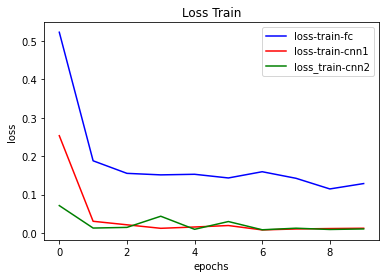

In [122]:
plot_results(Loss_train_fc, Loss_train_cnn1, Loss_train_cnn2)

In [127]:
accucary_test_fc = evaluate(test_loader, model_fc, 'cuda')
print(f"Accuracy en conjunto test - Red fc: {accucary_test_fc}")

accucary_test_cnn1 = evaluate(test_loader, model_cnn1, 'cuda')
print(f"Accuracy en conjunto test - Red cnn1: {accucary_test_cnn1}")

accucary_test_cnn2 = evaluate(test_loader, model_cnn2, 'cuda')
print(f"Accuracy en conjunto test - Red cnn2: {accucary_test_cnn2}")


Accuracy en conjunto test - Red fc: 0.991
Accuracy en conjunto test - Red cnn1: 0.9984
Accuracy en conjunto test - Red cnn2: 0.9988


> Comente los resultados

# Conclusi√≥n

Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media.tenor.com/vKSR-ZakVMIAAAAC/pochitadancing-pochita.gif">
</p>